In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import lasio
import matplotlib.colors as colors
from sklearn.preprocessing import StandardScaler

In [2]:
# Read the LAS file
data = lasio.read('16-1-9__WLC_PETRO_COMPOSITE__4.LAS')
dfa = data.df()
dfa = dfa.dropna()

df_idx = dfa.rename_axis('Depth').reset_index()
df = df_idx[:8000]
df['SEDP'] = np.log(df['SEDP'])
df['TNPL'] = df['TNPL']/100
df

C:\Users\sushila\AppData\Local\Temp\ipykernel_3960\4206300188.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SEDP'] = np.log(df['SEDP'])
C:\Users\sushila\AppData\Local\Temp\ipykernel_3960\4206300188.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TNPL'] = df['TNPL']/100


,Depth,DTCP,DTSP,KBGR,SBDC,SCOR,SEDP,SEMP,SESP,SEXP,SFXE,SHSI,SNPE,SROP,TNPL,VPVS
0,1273.5032,143.8940,392.3855,79.0930,1.7251,-0.3086,-0.578748,0.5606,0.2341,0.0636,0.9866,15.1025,8.3595,22.5830,0.271265,2.7388
1,1273.6556,145.8791,380.1884,81.9880,2.0471,0.1637,-0.571107,0.5735,0.2455,0.0646,0.9943,15.5955,7.4208,19.6350,0.344740,2.6098
2,1273.8080,148.9864,371.6118,96.3299,1.8611,0.1308,-0.568985,0.5725,0.2406,0.0644,1.0075,15.3598,7.2006,16.8264,0.418216,2.4966
3,1273.9604,149.7462,368.6105,96.3299,1.8580,0.1573,-0.577856,0.5661,0.2367,0.0643,1.0069,15.5366,6.6372,15.6120,0.461014,2.4643
4,1274.1128,153.8395,371.9019,97.1059,1.8309,0.1499,-0.568102,0.5642,0.2336,0.0638,1.0077,16.3128,6.6335,16.5261,0.483654,2.4191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2501.6948,79.7761,153.7168,122.2615,2.4970,0.1149,0.204572,1.0528,0.8700,0.5032,0.1324,12.6359,4.6286,37.8299,0.179667,1.9354
7996,2501.8472,80.6417,154.9314,131.9241,2.3862,0.0610,-0.483535,0.5859,0.5874,0.3827,0.1397,12.8350,3.2700,45.1382,0.196296,1.9395
7997,2501.9996,82.5076,157.3047,127.5310,2.2817,0.0761,-0.409624,0.5789,0.5332,0.3352,0.1401,13.2047,4.4392,49.6188,0.196296,1.9340
7998,2502.1520,84.9365,162.2527,115.5061,2.2731,0.1083,-0.602758,0.4718,0.4307,0.2794,0.1497,13.2086,5.4760,45.2814,0.209282,1.9229


In [3]:
df.columns

Index(['Depth', 'DTCP', 'DTSP', 'KBGR', 'SBDC', 'SCOR', 'SEDP', 'SEMP', 'SESP',
       'SEXP', 'SFXE', 'SHSI', 'SNPE', 'SROP', 'TNPL', 'VPVS'],
      dtype='object')

In [4]:
scalar = StandardScaler()

In [5]:
workingdf = df[['Depth', 'KBGR', 'SEDP', 'TNPL', 'SBDC']]

workingdf

,Depth,KBGR,SEDP,TNPL,SBDC
0,1273.5032,79.0930,-0.578748,0.271265,1.7251
1,1273.6556,81.9880,-0.571107,0.344740,2.0471
2,1273.8080,96.3299,-0.568985,0.418216,1.8611
3,1273.9604,96.3299,-0.577856,0.461014,1.8580
4,1274.1128,97.1059,-0.568102,0.483654,1.8309
...,...,...,...,...,...
7995,2501.6948,122.2615,0.204572,0.179667,2.4970
7996,2501.8472,131.9241,-0.483535,0.196296,2.3862
7997,2501.9996,127.5310,-0.409624,0.196296,2.2817
7998,2502.1520,115.5061,-0.602758,0.209282,2.2731


In [6]:
workingdf[['KBGR', 'SEDP', 'TNPL', 'SBDC']] = scalar.fit_transform(workingdf[['KBGR', 'SEDP', 'TNPL', 'SBDC']])
workingdf

C:\Users\sushila\AppData\Local\Temp\ipykernel_3960\3711861598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  workingdf[['KBGR', 'SEDP', 'TNPL', 'SBDC']] = scalar.fit_transform(workingdf[['KBGR', 'SEDP', 'TNPL', 'SBDC']])


,Depth,KBGR,SEDP,TNPL,SBDC
0,1273.5032,0.092679,0.062682,-0.991603,-3.562868
1,1273.6556,0.209463,0.075590,-0.235413,-1.302655
2,1273.8080,0.788010,0.079175,0.520788,-2.608244
3,1273.9604,0.788010,0.064188,0.961257,-2.630004
4,1274.1128,0.819313,0.080667,1.194263,-2.820227
...,...,...,...,...,...
7995,2501.6948,1.834081,1.385999,-1.934312,1.855327
7996,2501.8472,2.223867,0.223532,-1.763170,1.077589
7997,2501.9996,2.046650,0.348395,-1.763170,0.344072
7998,2502.1520,1.561570,0.022119,-1.629520,0.283706


### Clustering - Unsupervised
In this section, we are going to setup our clustering models and run them on our dataset.

First we will import our clustering models from the sklearn library.

In [7]:
from sklearn.cluster import KMeans


### Finding the Optimum Number of Clusters

We use the elbow plot. To do this we evaluate the model performance over a given range of clusters, and then from the plot identify the most suitable number.

In [8]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k, n_init=10)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(6, 3))
    plt.plot(means, inertias, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()
    

C:\Users\sushila\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


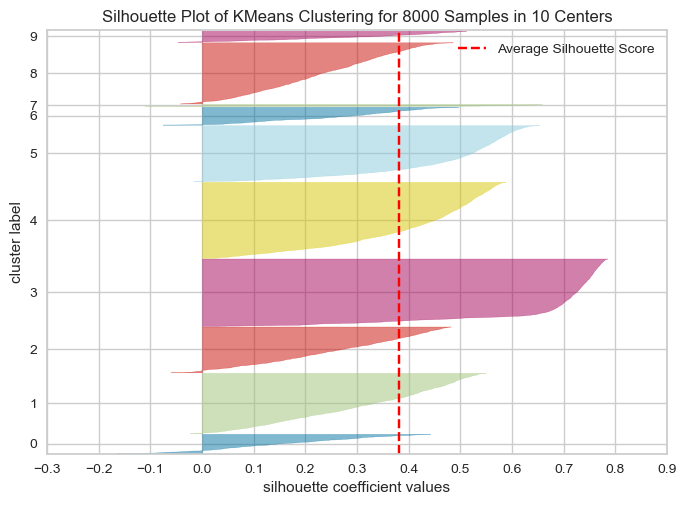

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 8000 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [9]:
from yellowbrick.cluster import SilhouetteVisualizer

def visualise_k_means_sillouette(data, max_k):
    fig, ax = plt.subplots(2, 3, figsize=(10, 5))
    means = []
    silhouette_avg = []
    
    for k in range(2,max_k): #start at 2 clusters
        print(k)
        kmeans = KMeans(n_clusters=k, n_init=10)
        q, mod = divmod(k, 2)
        
        vis = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
        vis.fit(data)
    
    # plt.plot(means, inertias, 'o-')
    # plt.xlabel("Number of Clusters")
    # plt.ylabel("Inertia")
    # plt.grid(True)
    # plt.show()

data = workingdf[["SEDP", "SBDC", "KBGR", "TNPL"]]
kmeans = KMeans(n_clusters=10)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(data)
visualizer.show()

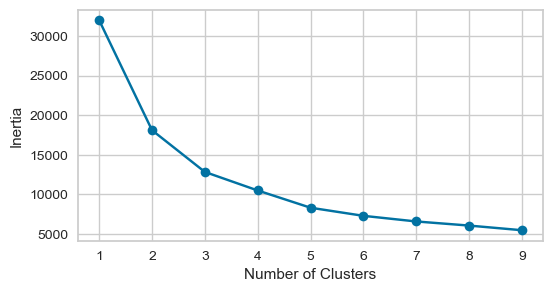

In [10]:

optimise_k_means(workingdf[['KBGR', 'SEDP', 'TNPL', 'SBDC']], 10)

In the plot above, we can see that the inertia (sum of the squared distances to the nearest cluster center) decreases as we increase the number of clusters. There is no clear defined break within this dataset, however, we can see that the slope changes from about 5 clusters onwards. The picking of this value will be dependent on the interpreter and could range from 4 to 10.

So for this example we will take 4 as the optimum number of clusters.

### Fitting the Clustering Models

In [11]:
# Create the KMeans model with the selected number of clusters
kmeans = KMeans(n_clusters=4, n_init=10, init='k-means++')

# Fit the model to our dataset
kmeans.fit(workingdf[['KBGR', 'SEDP', 'TNPL', 'SBDC' ]])

# Assign the data back to the workingdf
workingdf['KMeans'] = kmeans.labels_
df['KMeans'] = kmeans.labels_

C:\Users\sushila\AppData\Local\Temp\ipykernel_3960\2744796147.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  workingdf['KMeans'] = kmeans.labels_
C:\Users\sushila\AppData\Local\Temp\ipykernel_3960\2744796147.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['KMeans'] = kmeans.labels_


### Plotting the Results

Now that the clusters have been computed using KMeans and GMM methods, we can plot the data to see how well the predicted in relation to the labelled lithologies. Note that these methods are unsupervised and do not use the labelled data for training. We are comparing here how well unsupervised methods perform with well log data.


As we predicted into the main workingdf dataframe, we need to split the data up again into individual wells. We can do this by calling upon the simple function created earlier.

In [12]:
import matplotlib.colors as colors
def create_plot(dataframe, curves_to_plot, depth_curve, log_curves=[], facies_curves=[]):
    # Count the number of tracks we need
    num_tracks = len(curves_to_plot)
    
    facies_color = ['tab:green','tab:pink','tab:red','tab:olive']
    

            
    # Setup the figure and axes
    fig, ax = plt.subplots(nrows=1, ncols=num_tracks, figsize=(num_tracks*1.2, 10))
    
    # Create a super title for the entire plot
    fig.suptitle("Log curves and their clusters", fontsize=20, y=1.05)

    
    # Loop through each curve in curves_to_plot and create a track with that data
    for i, curve in enumerate(curves_to_plot):
        if curve in facies_curves:
            cmap_facies = colors.ListedColormap(facies_color[0:dataframe[curve].max()], 'indexed')
            
            cluster=np.repeat(np.expand_dims(dataframe[curve].values,1), 100, 1)
            im=ax[i].imshow(cluster, interpolation='none', cmap=cmap_facies, aspect='auto',vmin=dataframe[curve].min(),vmax=dataframe[curve].max(), 
                            extent=[0,20, depth_curve.max(), depth_curve.min()])
            
               
        else:
            ax[i].plot(dataframe[curve], depth_curve)

        
        # Setup a few plot cosmetics
        ax[i].set_title(curve, fontsize=12)
        ax[i].grid(which='major', color='lightgrey', linestyle='-')
        
        # We want to pass in the deepest depth first, so we are displaying the data 
        # from shallow to deep
        ax[i].set_ylim(depth_curve.max(), depth_curve.min())
#         ax[i].set_ylim(3500, 3000)

        # Only set the y-label for the first track. Hide it for the rest
        if i == 0:
            ax[i].set_ylabel('DEPTH (m)', fontsize=18, fontweight='bold')
        else:
            plt.setp(ax[i].get_yticklabels(), visible = False)
        
        # Check to see if we have any logarithmic scaled curves
        if curve in log_curves:
            ax[i].set_xscale('log')
            ax[i].grid(which='minor', color='lightgrey', linestyle='-')
        

    
    plt.tight_layout()
    plt.show()
    
    return cmap_facies

In [13]:
# Setup the curves to plot
curves_to_plot = ["SEDP", "SBDC", "KBGR", "TNPL", 'KMeans']
logarithmic_curves = ['RDEP']
facies_curve=['KMeans']

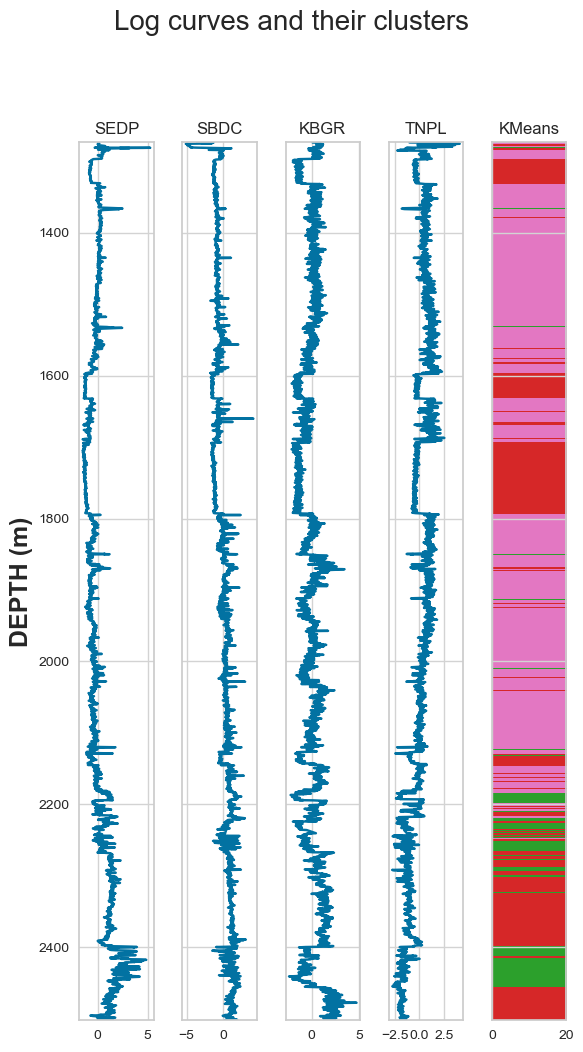

In [14]:
cmap_facies = create_plot(
            workingdf, 
            curves_to_plot, 
            workingdf['Depth'], 
            logarithmic_curves, facies_curve)

In [15]:
workingdf

,Depth,KBGR,SEDP,TNPL,SBDC,KMeans
0,1273.5032,0.092679,0.062682,-0.991603,-3.562868,2
1,1273.6556,0.209463,0.075590,-0.235413,-1.302655,1
2,1273.8080,0.788010,0.079175,0.520788,-2.608244,1
3,1273.9604,0.788010,0.064188,0.961257,-2.630004,1
4,1274.1128,0.819313,0.080667,1.194263,-2.820227,1
...,...,...,...,...,...,...
7995,2501.6948,1.834081,1.385999,-1.934312,1.855327,3
7996,2501.8472,2.223867,0.223532,-1.763170,1.077589,3
7997,2501.9996,2.046650,0.348395,-1.763170,0.344072,3
7998,2502.1520,1.561570,0.022119,-1.629520,0.283706,3


In [17]:
def find_cluster_intervals_sorted(df, cluster_column):
    cluster_intervals = []
    cluster_count = 1
    prev_cluster = df.iloc[0][cluster_column]
    start_depth = df.iloc[0]['Depth']
    end_depth = None
    
    for index, row in df.iterrows():
        current_cluster = row[cluster_column]
        
        if current_cluster == prev_cluster:
            cluster_count += 1
        else:
            if cluster_count > 1:  # If cluster repeated more than once
                end_depth = row['Depth']
                cluster_intervals.append((start_depth, end_depth, end_depth - start_depth))
            
            cluster_count = 1
            prev_cluster = current_cluster
            start_depth = row['Depth']
    
    # Check for the last cluster sequence
    if cluster_count > 1:  # If cluster repeated more than once
        end_depth = df.iloc[-1]['Depth']
        cluster_intervals.append((start_depth, end_depth, end_depth - start_depth))
    
    # Sort intervals based on the gap between upper and lower depth values
    cluster_intervals.sort(key=lambda x: x[2], reverse=True)
    
    return cluster_intervals

# Finding and sorting cluster intervals for 'KMeans' column
kmeans_sorted_cluster_intervals = find_cluster_intervals_sorted(workingdf, 'KMeans')
print("Sorted cluster intervals based on 'KMeans' column (by gap):", kmeans_sorted_cluster_intervals)


Sorted cluster intervals based on 'KMeans' column (by gap): [(1693.5176, 1793.0348, 99.5172), (1435.1996, 1533.0404, 97.84080000000017), (1923.3368, 2007.7664, 84.42959999999994), (2038.5512, 2119.7804, 81.22919999999999), (2325.5204, 2399.4344, 73.91400000000021), (1378.5068, 1435.0472, 56.54039999999986), (2455.9748, 2502.3044, 46.32960000000003), (1793.0348, 1835.0972, 42.062400000000025), (2415.7412, 2455.9748, 40.233600000000024), (1872.8924, 1911.2972, 38.40480000000002), (1597.658, 1632.1004, 34.442400000000134), (1296.9728, 1331.4152, 34.44239999999991), (1331.4152, 1365.4004, 33.98520000000008), (1534.412, 1563.368, 28.955999999999904), (2305.4036, 2325.0632, 19.659599999999955), (2399.4344, 2414.2172, 14.782799999999952), (1850.1848, 1864.358, 14.173199999999952), (1632.1004, 1645.664, 13.563599999999951), (2129.3816, 2142.7928, 13.411200000000008), (2181.5024, 2194.304, 12.801600000000235), (1284.9332, 1296.9728, 12.039600000000064), (1367.2292, 1378.202, 10.972800000000007)

In [18]:
len(kmeans_sorted_cluster_intervals)

215

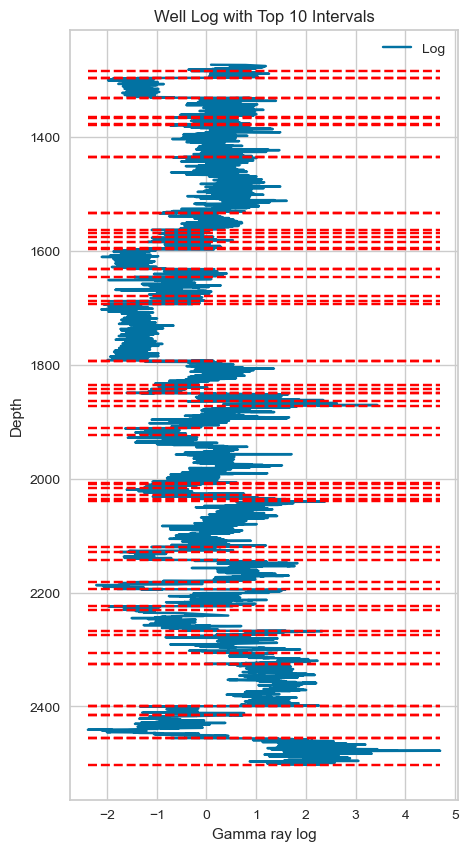

In [19]:

log = workingdf['KBGR']

# Plotting well log columns against Depth
fig, ax = plt.subplots(figsize=(5,10))

# Plot well log curves
# Replace 'workingdf['YourLogColumn']' with the actual log columns from your DataFrame
ax.plot(log, workingdf['Depth'], label='Log')

# Plot the top 10 intervals with the highest gaps as horizontal lines
top_10_intervals = kmeans_sorted_cluster_intervals[:30] # Extract top 10 intervals
for interval in top_10_intervals:
    start_depth, end_depth, _ = interval
    ax.hlines(y=[start_depth, end_depth], xmin=log.min(), xmax= log.max(), colors='red', linestyles='--')

# Set labels and title
ax.set_xlabel('Gamma ray log')
ax.set_ylabel('Depth')
ax.set_title('Well Log with Top 10 Intervals')

# Show legend
ax.legend()
# Invert the y-axis (depth axis)
ax.invert_yaxis()

plt.grid(True)
plt.show()


In [20]:
top_10_intervals


[(1693.5176, 1793.0348, 99.5172),
 (1435.1996, 1533.0404, 97.84080000000017),
 (1923.3368, 2007.7664, 84.42959999999994),
 (2038.5512, 2119.7804, 81.22919999999999),
 (2325.5204, 2399.4344, 73.91400000000021),
 (1378.5068, 1435.0472, 56.54039999999986),
 (2455.9748, 2502.3044, 46.32960000000003),
 (1793.0348, 1835.0972, 42.062400000000025),
 (2415.7412, 2455.9748, 40.233600000000024),
 (1872.8924, 1911.2972, 38.40480000000002),
 (1597.658, 1632.1004, 34.442400000000134),
 (1296.9728, 1331.4152, 34.44239999999991),
 (1331.4152, 1365.4004, 33.98520000000008),
 (1534.412, 1563.368, 28.955999999999904),
 (2305.4036, 2325.0632, 19.659599999999955),
 (2399.4344, 2414.2172, 14.782799999999952),
 (1850.1848, 1864.358, 14.173199999999952),
 (1632.1004, 1645.664, 13.563599999999951),
 (2129.3816, 2142.7928, 13.411200000000008),
 (2181.5024, 2194.304, 12.801600000000235),
 (1284.9332, 1296.9728, 12.039600000000064),
 (1367.2292, 1378.202, 10.972800000000007),
 (1584.8564, 1595.6768, 10.8204000000

In [21]:
# Extract start_depth and end_depth values from the list of tuples
start_depths = [interval[0] for interval in top_10_intervals]
end_depths = [interval[1] for interval in top_10_intervals]

# Combine start_depths and end_depths into a single list
all_depths = start_depths + end_depths

# Remove duplicate depths by converting the list to a set and back to a list
unique_depths = list(set(all_depths))

# Sort the combined list of depths in ascending order
sorted_depths = sorted(unique_depths)

# Display the sorted list of depths
print("Sorted depths in ascending order:")
print(sorted_depths)




Sorted depths in ascending order:
[1284.9332, 1296.9728, 1331.4152, 1365.4004, 1367.2292, 1378.202, 1378.5068, 1435.0472, 1435.1996, 1533.0404, 1534.412, 1563.368, 1569.6164, 1576.7792, 1584.8564, 1595.6768, 1597.658, 1632.1004, 1645.664, 1679.3444, 1688.0312, 1693.5176, 1793.0348, 1835.0972, 1843.022, 1849.2704, 1850.1848, 1864.358, 1872.8924, 1911.2972, 1923.3368, 2007.7664, 2010.0524, 2016.4532, 2028.4928, 2035.5032, 2038.5512, 2119.7804, 2129.3816, 2142.7928, 2181.5024, 2194.304, 2224.022, 2231.3372, 2267.1512, 2274.0092, 2305.4036, 2325.0632, 2325.5204, 2399.4344, 2414.2172, 2415.7412, 2455.9748, 2502.3044]


## Intrinsic metrices

The silhouette score measures how similar an object is to its cluster compared to other clusters. Higher silhouette scores (closer to 1) indicate better-defined clusters.

In [22]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(workingdf[["SEDP", "SBDC", "KBGR", "TNPL"]], kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.4182975872948242


The silhouette score measures how well-separated the clusters are. A score closer to 1 indicates better-defined clusters. 

The Davies-Bouldin index quantifies the average similarity between each cluster and its most similar cluster, where lower values denote better clustering.

In [23]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(workingdf[["SEDP", "SBDC", "KBGR", "TNPL"]], kmeans.labels_)
print(f"Davies-Bouldin Index: {davies_bouldin}")


Davies-Bouldin Index: 0.9333097600349014


The Davies-Bouldin index assesses the average similarity between clusters, where lower values denote better separation. 

The Calinski-Harabasz index evaluates the ratio of between-cluster dispersion to within-cluster dispersion. Higher values indicate better-defined, well-separated clusters.

In [24]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(workingdf[["SEDP", "SBDC", "KBGR", "TNPL"]], kmeans.labels_)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")


Calinski-Harabasz Index: 5470.265902572523


The Calinski-Harabasz index evaluates the ratio of between-cluster dispersion to within-cluster dispersion. Higher values signify better-defined clusters. 